URL : https://github.com/nxs5899/end-to-end-Machine-Learning-model-with-MLlib-in-pySpark/blob/master/MLlib_pySpark.ipynb

URL : https://towardsdatascience.com/build-an-end-to-end-machine-learning-model-with-mllib-in-pyspark-4917bdf289c5

In [4]:
# !pip install pyspark

  Using cached py4j-0.10.9-py2.py3-none-any.whl (198 kB)
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=fc464862f4474fbf64636821acaedcd2c47784a18bfd2971ee0e6cc58d7048f3
  Stored in directory: c:\users\jiss\appdata\local\pip\cache\wheels\df\88\9e\58ef1f74892fef590330ca0830b5b6d995ba29b44f977b3926
Successfully built pyspark


You should consider upgrading via the 'D:\Softwares\AnacondaInstall\python.exe -m pip install --upgrade pip' command.


In [5]:
# !pip install pyspark[sql]

You should consider upgrading via the 'D:\Softwares\AnacondaInstall\python.exe -m pip install --upgrade pip' command.


In [7]:
import findspark

In [8]:
findspark.init()

In [9]:
findspark.find()

'C:\\SparkMLBD\\Spark'

In [10]:
import pyspark

In [11]:
findspark.find()

'C:\\SparkMLBD\\Spark'

In [16]:
config = SparkConf().setAppName('SparkApp').setMaster('local')
sc= SparkContext(conf=config)
spark = SparkSession

In [56]:
conda create -n pyspark_env

^C

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !conda env list

In [ ]:
# !PYSPARK_HADOOP_VERSION=3.2 pip install pyspark

In [18]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()
sc.version

'3.1.1'

In [19]:
spark = SparkSession.builder \
       .master("local") \
       .appName("Athulspark") \
       .config("spark.some.config.option", "some-value") \
       .getOrCreate()

In [20]:
new_df = spark.read.csv('athul_test.csv', header=True, inferSchema=True)
new_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- rotationRate: double (nullable = true)
 |-- userAcceleration: double (nullable = true)
 |-- act: double (nullable = true)
 |-- id: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- height: double (nullable = true)
 |-- age: double (nullable = true)
 |-- gender: double (nullable = true)
 |-- trial: double (nullable = true)



In [21]:
act_lbl = ["Sat", "Stand-Up", "Downstairs", "Upstairs", "Walking", "Jogging"]

In [22]:
drop_col = ['_c0', 'id', 'trial']

new_df = new_df.select([column for column in new_df.columns if column not in drop_col])
new_df = new_df.withColumnRenamed('act', 'label')
new_df.groupby('label').count().toPandas()

,label,count
0,0.0,234657
1,1.0,224816
2,4.0,158645
3,3.0,58204
4,2.0,50246
5,5.0,104327


In [23]:
# ! pip install seaborn

830895


<AxesSubplot:xlabel='label', ylabel='count'>

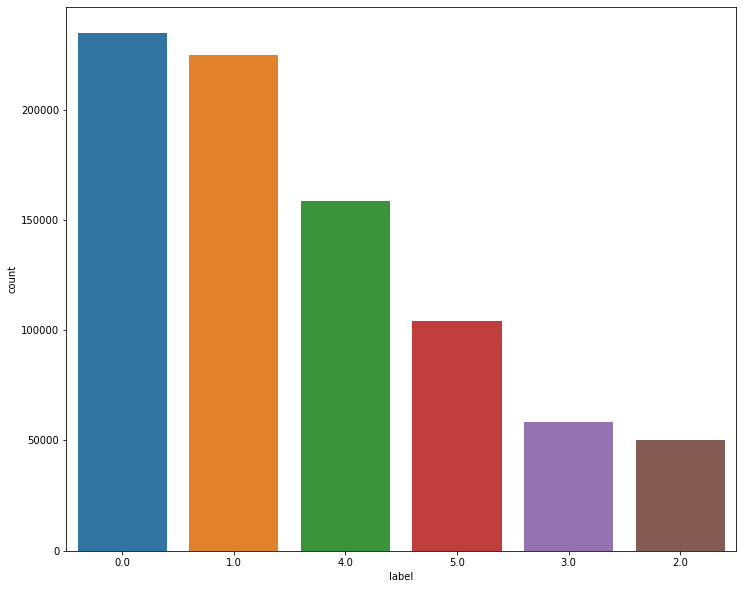

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_pd = new_df.toPandas()
print(len(df_pd))

plt.figure(figsize=(12,10))
sns.countplot(x='label', data=df_pd, order=df_pd['label'].value_counts().index)

In [25]:
import pandas as pd

pd.DataFrame(new_df.take(10), columns= new_df.columns)

,rotationRate,userAcceleration,label,weight,height,age,gender
0,0.010253,0.006959,0.0,102.0,188.0,46.0,1.0
1,0.010920,0.010673,0.0,102.0,188.0,46.0,1.0
2,0.008377,0.007010,0.0,102.0,188.0,46.0,1.0
3,0.006555,0.014892,0.0,102.0,188.0,46.0,1.0
4,0.007724,0.013001,0.0,102.0,188.0,46.0,1.0
5,0.008544,0.008358,0.0,102.0,188.0,46.0,1.0
6,0.010706,0.007313,0.0,102.0,188.0,46.0,1.0
7,0.006017,0.011407,0.0,102.0,188.0,46.0,1.0
8,0.010136,0.008716,0.0,102.0,188.0,46.0,1.0
9,0.011316,0.010180,0.0,102.0,188.0,46.0,1.0


In [26]:
cat_cols = [item[0] for item in new_df.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols)) + '  categorical features')

num_cols = [item[0] for item in new_df.dtypes if item[1].startswith('int') | item[1].startswith('double')][1:]
print(str(len(num_cols)) + '  numerical features')

0  categorical features
6  numerical features


In [27]:
def info_missing_table(df_pd):
    """Input pandas dataframe and Return columns with missing value and percentage"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
#count percentage of null in each columns
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
 #join to left (as column) between mis_val and mis_val_percent
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) 
#rename columns in table
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1) 
        
    print ("Your selected dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns

In [28]:
missings = info_missing_table(df_pd)
missings

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [29]:
def count_missings(spark_df):
    null_counts = []        
    for col in spark_df.dtypes:    
        cname = col[0]     
        ctype = col[1]      
        nulls = spark_df.where( spark_df[cname].isNull()).count() #check count of null in column name
        result = tuple([cname, nulls])  #new tuple, (column name, null count)
        null_counts.append(result)      #put the new tuple in our result list
    null_counts=[(x,y) for (x,y) in null_counts if y!=0]  #view just columns that have missing values
    return null_counts

In [30]:
miss_counts = count_missings(new_df)
miss_counts

[]

In [31]:
# # adding the new column weights and fill it with ratios
# from pyspark.sql.functions import when

# ratio = 0.91
# def weight_balance(labels):
#     return when(labels == 1, ratio).otherwise(1*(1-ratio))

# new_df = new_df.withColumn('weights', weight_balance(col('label')))

In [32]:
pd.DataFrame(new_df.take(10), columns= new_df.columns)

,rotationRate,userAcceleration,label,weight,height,age,gender
0,0.010253,0.006959,0.0,102.0,188.0,46.0,1.0
1,0.010920,0.010673,0.0,102.0,188.0,46.0,1.0
2,0.008377,0.007010,0.0,102.0,188.0,46.0,1.0
3,0.006555,0.014892,0.0,102.0,188.0,46.0,1.0
4,0.007724,0.013001,0.0,102.0,188.0,46.0,1.0
5,0.008544,0.008358,0.0,102.0,188.0,46.0,1.0
6,0.010706,0.007313,0.0,102.0,188.0,46.0,1.0
7,0.006017,0.011407,0.0,102.0,188.0,46.0,1.0
8,0.010136,0.008716,0.0,102.0,188.0,46.0,1.0
9,0.011316,0.010180,0.0,102.0,188.0,46.0,1.0


In [33]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stages = []
for categoricalCol in cat_cols:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

assemblerInputs = [c + "classVec" for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [34]:
from pyspark.ml import Pipeline

cols = new_df.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(new_df)
new_df = pipelineModel.transform(new_df)

In [35]:
selectedCols = ['features']+cols
new_df = new_df.select(selectedCols)
pd.DataFrame(new_df.take(5), columns=new_df.columns)

,features,rotationRate,userAcceleration,label,weight,height,age,gender
0,"[0.006959199379238966, 0.0, 102.0, 188.0, 46.0...",0.010253,0.006959,0.0,102.0,188.0,46.0,1.0
1,"[0.010672920359489243, 0.0, 102.0, 188.0, 46.0...",0.010920,0.010673,0.0,102.0,188.0,46.0,1.0
2,"[0.0070096587648757905, 0.0, 102.0, 188.0, 46....",0.008377,0.007010,0.0,102.0,188.0,46.0,1.0
3,"[0.014892331247994722, 0.0, 102.0, 188.0, 46.0...",0.006555,0.014892,0.0,102.0,188.0,46.0,1.0
4,"[0.013001225519157802, 0.0, 102.0, 188.0, 46.0...",0.007724,0.013001,0.0,102.0,188.0,46.0,1.0


In [36]:
# split the data into trainign and testin sets

train, test = new_df.randomSplit([0.80, 0.20], seed = 42)
print(train.count())
print(test.count())

665002
165893


## LogisticRegression

In [37]:
# first we check how LogisticRegression perform 
from pyspark.ml.classification import LogisticRegression

LR = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=15)
LR_model = LR.fit(train)

In [38]:
print("Coefficients: \n" + str(LR_model.coefficientMatrix))
print("Intercept: " + str(LR_model.interceptVector))

trainingSummary = LR_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

Coefficients: 
DenseMatrix([[-1.26544111e+01, -8.15296408e+00, -2.96777156e-03,
               7.76273200e-02,  3.56301098e-02, -3.96039342e-01],
             [-1.14428792e+01, -3.58723835e+00,  6.74197593e-03,
               5.76398703e-02,  5.66946178e-02,  1.11082274e-01],
             [ 1.58199502e+00, -1.29314214e-01, -2.01308657e-03,
               3.91864139e-02, -1.78357894e-02, -2.49877423e-01],
             [ 7.87508315e-01,  1.02485378e+00,  1.87902048e-03,
               2.47650773e-02, -1.50995412e-02, -1.47456518e-01],
             [ 6.88825045e+00,  5.24097407e+00,  3.69467437e-03,
              -7.40988493e-02, -5.11317288e-02,  1.12107310e+00],
             [ 1.48395365e+01,  5.60368879e+00, -7.33481265e-03,
              -1.25119832e-01, -8.25766827e-03, -4.38782093e-01]])
Intercept: [0.7211368991798303,0.6883807737244825,-0.8132311399024507,-0.6784052184722136,0.23821847008609687,-0.15609978461574509]
objectiveHistory:
1.6436897894180902
1.4401408951850654
1.12774370

In [39]:
#for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

False positive rate by label:
label 0: 0.0
label 1: 0.00041009028168462614
label 2: 0.0002961407260730299
label 3: 0.03003030195232536
label 4: 0.06536046135483943
label 5: 0.03924809598833169
True positive rate by label:
label 0: 0.9999254105085937
label 1: 0.9990486416717201
label 2: 0.4845281520633266
label 3: 0.7795962199312715
label 4: 0.8537778896686282
label 5: 0.6755185530754324
Precision by label:
label 0: 1.0
label 1: 0.9988930361404231
label 2: 0.9906143777586119
label 3: 0.6615272462183343
label 4: 0.7553087089971394
label 5: 0.712211978660882
Recall by label:
label 0: 0.9999254105085937
label 1: 0.9990486416717201
label 2: 0.4845281520633266
label 3: 0.7795962199312715
label 4: 0.8537778896686282
label 5: 0.6755185530754324
F-measure by label:
label 0: 0.999962703863347
label 1: 0.9989708328465651
label 2: 0.6507582069655058
label 3: 0.715725130631963
label 4: 0.8015303541159656
label 5: 0.6933801545837963


In [40]:
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall

print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 0.8843131298853236
FPR: 0.01965822018857779
TPR: 0.8843131298853237
F-measure: 0.8821630545860956
Precision: 0.892485713973054
Recall: 0.8843131298853237


In [41]:
predictions = LR_model.transform(test)
predictions.select("prediction").show(1)

+----------+
|prediction|
+----------+
|       0.0|
+----------+
only showing top 1 row



In [42]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8838379033267365

### Test

In [43]:
inputCols = ["rotationRate", "userAcceleration","weight", "height", "age", "gender"]

outputCol = "features"

In [44]:
df = spark.createDataFrame([(0.010253, 0.006959, 102.0, 188.0, 46.0, 1.0)], inputCols)
# df = spark.createDataFrame([(3.8651705114155055,1.6289638410434408,70.0,180.0,35.0,1.0)], inputCols)

In [45]:
df_va = VectorAssembler(inputCols = inputCols, outputCol = outputCol)

df = df_va.transform(df)

In [46]:
prediction = LR_model.transform(df)
prediction.select("prediction").show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+



## Decision Tree

In [47]:
from pyspark.ml.classification import DecisionTreeClassifier

# Train a DecisionTree model.
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label')
DT_model = dt.fit(train)

In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Make predictions.
predictions = DT_model.transform(df)
predictions.select("prediction").show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+



# Gradio UI

In [49]:
# ! pip install gradio

You should consider upgrading via the 'D:\Softwares\AnacondaInstall\python.exe -m pip install --upgrade pip' command.



  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached Flask_CacheBuster-1.0.0-py3-none-any.whl
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=5a3bc8447e4f6bdb9180a534e341ed014c65cf759efb8b7ce7e51db12ce59991
  Stored in directory: c:\users\jiss\appdata\local\pip\cache\wheels\ff\5b\59\913b443e7369dc04b61f607a746b6f7d83fb65e2e19fcc958d
Successfully built ffmpy


In [50]:
import numpy as np
import pandas as pd

# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [51]:
def model_selector(algo):
    model = LR_model
    if algo == "Logistic regression":
        model = LR_model
    elif algo == "DT":
        model = DT_model
    return model

In [52]:
def get_input(device):
    acc1 = 0
    gyro1 = 0
    acc2 = 0
    gyro2 = 0
    
    if device == "Device 1":
        acc1 = 0.010253
        gyro1 = 0.006959
    elif device == "Device 2":
        acc2 = 1.6289638410434408
        gyro2 = 3.8651705114155055
    else:
        acc1 = 0.010253
        gyro1 = 0.006959
        acc2 = 0.010253
        gyro2 = 0.006959
        
    return gyro1, acc1, gyro2, acc2

In [53]:
def get_prediction(device, algo, gender, age, height, weight):
    
    if gender ==  "Male":
        gender = 0
    else:
        gender = 1
        
    print(device, algo, gender, age, height, weight)
    
    prediction1 = None
    prediction2 = None
    
    if device == "Device 1":
        print("Device 1 Selected")
        gyro, acc, _ , _ = get_input(device)
        df = spark.createDataFrame([(gyro,acc,weight, height, age, gender)], inputCols)
        df_va = VectorAssembler(inputCols = inputCols, outputCol = outputCol)
        df = df_va.transform(df)
        model = model_selector(algo)
        prediction = model.transform(df)
        result_pdf = prediction.select("*").toPandas()
        prediction1 = result_pdf.prediction[0]
        print(gyro, acc)
        
    elif device == "Device 2":
        print("Device 2 Selected")
        _ , _ , gyro, acc = get_input(device)
        df = spark.createDataFrame([(gyro,acc,weight, height, age, gender)], inputCols)
        df_va = VectorAssembler(inputCols = inputCols, outputCol = outputCol)
        df = df_va.transform(df)
        model = model_selector(algo)
        prediction = model.transform(df)
        result_pdf = prediction.select("*").toPandas()
        prediction2 = result_pdf.prediction[0]
        print(gyro, acc)
        
    else:
        print("Device 1 & 2")
        
        gryo1, acc1, gryo2, acc2 = get_input(device)
        prediction1 = "device 1"
        prediction2 = "device 2"
        
    

    return prediction1, prediction2

In [54]:
import gradio as gr

img = gr.inputs.Image()

title = "Human Activity Recognition"

device = gr.inputs.Dropdown(choices = ["Device 1", "Device 2", "Device 1 & 2"], type="value", label="Select Device")

algo = gr.inputs.Radio(["Logistic Regression", "DT"], label="Choose Algorithm")

gender = gr.inputs.CheckboxGroup(choices = ["Male", "Female"], type="value", label="Gender")
age = gr.inputs.Slider(minimum = 20, maximum=80, step=1, default=25, label="Age")
height = gr.inputs.Slider(minimum = 100, maximum=200, step=1, default=180, label="Height")
weight = gr.inputs.Slider(minimum = 40, maximum=90, step=1, default=74, label="Weight")
        
# prediction1 = gr.outputs.Dataframe(headers=None, type="auto", label=None)
prediction1 = gr.outputs.Textbox(type="auto", label="Device 1")
prediction2 = gr.outputs.Textbox(type="auto", label="Device 2")

gr.Interface(get_prediction, inputs = [device, algo, gender, age, height, weight],   
             outputs = [prediction1, prediction2], 
             title=title,
             live=False).launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://16983.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://16983.gradio.app')

Device 1 Logistic Regression 1 25 165 60
Device 1 Selected


C:\SparkMLBD\Spark\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Device 1 Logistic Regression 1 25 165 60
Device 1 Selected


[2021-06-02 19:37:26,413] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask_cors\extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "D:\Softwares\AnacondaInstall\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Softwares\AnacondaInstall\

0.006959 0.010253
Device 1 Logistic Regression 1 25 165 60
Device 1 Selected
0.006959 0.010253
Device 1 Logistic Regression 1 25 165 60
Device 1 Selected
0.006959 0.010253
Device 1 Logistic Regression 1 25 184 60
Device 1 Selected
0.006959 0.010253
Device 1 Logistic Regression 1 25 184 64
Device 1 Selected
0.006959 0.010253
Device 2 Logistic Regression 1 25 184 64
Device 2 Selected
3.8651705114155055 1.6289638410434408
